In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score, f1_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import utils as ut

In [2]:
data = pd.read_csv('data/training_set_features.csv')
labels = pd.read_csv('data/training_set_labels.csv')

In [3]:
# The features in this dataset
# You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

# For all binary variables: 0 = No; 1 = Yes.

# h1n1_concern - Level of concern about the H1N1 flu.
# 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
# h1n1_knowledge - Level of knowledge about H1N1 flu.
# 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
# behavioral_antiviral_meds - Has taken antiviral medications. (binary)
# behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
# behavioral_face_mask - Has bought a face mask. (binary)
# behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
# behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
# behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
# behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
# doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
# doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
# chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
# child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
# health_worker - Is a healthcare worker. (binary)
# health_insurance - Has health insurance. (binary)
# opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
# 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
# opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
# 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
# opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
# 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
# opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
# 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
# opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
# 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
# opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
# 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
# age_group - Age group of respondent.
# education - Self-reported education level.
# race - Race of respondent.
# sex - Sex of respondent.
# income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
# marital_status - Marital status of respondent.
# rent_or_own - Housing situation of respondent.
# employment_status - Employment status of respondent.
# hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
# census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
# household_adults - Number of other adults in household, top-coded to 3.
# household_children - Number of children in household, top-coded to 3.
# employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
# employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [4]:
# train test split
# deal with nulls
# look for patterns in the nulls
# no numeric columns so no need to look for outliers
# one hot encode categorical columns
# scale
# vanilla model
# check for multicolinearity (or variables that are not independent)
# solve class imbalance problems?? - no need
# look for interactions? - marital status and sex, also employment status and sex
# logistic regression!
# -->can experiment with the regularization parameter (C)
# eval measure should be ROC-AUC (for competition anyway)
# try a tree!  a forest!
# try ensemble method?  XGBoost?
# pipeline!
# use confusion matrices to evaluate
# what can be learned from coefficients

# does health worker data match employment data?


In [5]:
# use k fold cross validation to make sure you're not overfitting to this test set
# try all combos for other models, use gridsearch
# steal and use Lindsey's evaluate function if you want - Topic 32 Pipelines plus phase 3 wrap up
# it includes a confusion matrix
# if doing a logreg, look at week 20 optional challenge

In [6]:

# look at practice notebook from week 22
# shows steps of building a simple model, testing models, iterating, choosing a model
# try to do 3 model types

# include all detail on "why did I make that decision?"  "why did I do that next step?"
# especially: why did you decide to use this model?


In [7]:
labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [8]:
# define X (predictors) and y (target)
# keep only predictors which a health management organization would have on file
# use seasonal flu vaccine outcome as target (disregard H1N1)

X = data.drop(columns=['h1n1_concern',
                       'h1n1_knowledge',
                       'behavioral_antiviral_meds',
                       'behavioral_avoidance',
                       'behavioral_face_mask',
                       'behavioral_wash_hands',
                       'behavioral_large_gatherings',
                       'behavioral_outside_home',
                       'behavioral_touch_face',
                       'doctor_recc_h1n1',
                       'child_under_6_months',
                       'opinion_h1n1_vacc_effective',
                       'opinion_h1n1_risk',
                       'opinion_h1n1_sick_from_vacc',
                       'opinion_h1n1_sick_from_vacc',
                       'opinion_seas_vacc_effective',
                       'opinion_seas_risk',
                       'opinion_seas_sick_from_vacc',
                       'education',
                       'income_poverty',
                       'rent_or_own',
                       'household_adults',
                       'household_children'])

y = labels['seasonal_vaccine']

In [9]:
X

,respondent_id,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0,0.00000,0.00000,0.00000,1.00000,55 - 64 Years,White,Female,Not Married,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,1,0.00000,0.00000,0.00000,1.00000,35 - 44 Years,White,Male,Not Married,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,2,nan,1.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,3,1.00000,1.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,4,0.00000,0.00000,0.00000,nan,45 - 54 Years,White,Female,Married,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0.00000,0.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,26703,1.00000,0.00000,1.00000,1.00000,18 - 34 Years,White,Male,Not Married,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,26704,0.00000,0.00000,0.00000,nan,55 - 64 Years,White,Female,Not Married,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,26705,0.00000,0.00000,0.00000,0.00000,18 - 34 Years,Hispanic,Female,Married,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [10]:
# eliminate id column, which is the same as index number

X.drop(columns='respondent_id', inplace=True)
X

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0.00000,0.00000,0.00000,1.00000,55 - 64 Years,White,Female,Not Married,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,0.00000,0.00000,0.00000,1.00000,35 - 44 Years,White,Male,Not Married,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,nan,1.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,1.00000,1.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,0.00000,0.00000,0.00000,nan,45 - 54 Years,White,Female,Married,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.00000,0.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,1.00000,0.00000,1.00000,1.00000,18 - 34 Years,White,Male,Not Married,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,0.00000,0.00000,0.00000,nan,55 - 64 Years,White,Female,Not Married,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,0.00000,0.00000,0.00000,0.00000,18 - 34 Years,Hispanic,Female,Married,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [11]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
# no class imbalance in target

y_train.value_counts()

0    10673
1     9357
Name: seasonal_vaccine, dtype: int64

In [13]:
# explore variables

X_train
X_train.describe()
X_train.info()

# many nulls
# many categorical columns --> need to one hot encode

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 1917 to 1202
Data columns (total 13 columns):
doctor_recc_seasonal     18406 non-null float64
chronic_med_condition    19299 non-null float64
health_worker            19420 non-null float64
health_insurance         10856 non-null float64
age_group                20030 non-null object
race                     20030 non-null object
sex                      20030 non-null object
marital_status           18964 non-null object
employment_status        18923 non-null object
hhs_geo_region           20030 non-null object
census_msa               20030 non-null object
employment_industry      9991 non-null object
employment_occupation    9891 non-null object
dtypes: float64(4), object(9)
memory usage: 2.1+ MB


In [14]:
# show per cent nulls by column
# about half of data is missing for health_insurance, employment_industry, employment_occupation

round((X_train.isna().sum()*100/len(X_train)),2)

doctor_recc_seasonal     8.11000
chronic_med_condition    3.65000
health_worker            3.05000
health_insurance        45.80000
age_group                0.00000
race                     0.00000
sex                      0.00000
marital_status           5.32000
employment_status        5.53000
hhs_geo_region           0.00000
census_msa               0.00000
employment_industry     50.12000
employment_occupation   50.62000
dtype: float64

In [15]:
# look closer at three columns with high null percentages - see if there is an obvious choice to impute

for c in X_train[['health_insurance','employment_industry','employment_occupation']]:
    print(X_train[c].value_counts())
    
# most ppl have health insurance, I can create a new column to indicate which rows are missing this info
# employment industry and occupation - when encoded, nulls will be ignored

1.00000    9560
0.00000    1296
Name: health_insurance, dtype: int64
fcxhlnwr    1837
wxleyezf    1339
ldnlellj     928
pxcmvdjn     764
atmlpfrs     702
arjwrbjb     657
xicduogh     626
mfikgejo     466
rucpziij     397
vjjrobsf     387
xqicxuve     373
saaquncn     247
cfqqtusy     241
nduyfdeo     224
mcubkhph     210
wlfvacwt     153
dotnnunm     152
haxffmxo     119
msuufmds      90
phxvnwax      67
qnlwzans      12
Name: employment_industry, dtype: int64
xtkaffoo    1336
mxkfnird    1128
emcorrxb     938
cmhcxjea     924
xgwztkwe     796
hfxkjkmi     561
qxajmpny     400
xqwwgdyp     362
kldqjyjy     354
uqqtjvyb     336
tfqavkke     294
vlluhbov     268
oijqvulv     265
ukymxvdu     264
ccgxvspp     261
bxpfxfdn     247
haliazsg     234
xzmlyyjv     205
rcertsgn     202
dlvbwzss     173
hodpvpew     151
dcjcmpih     119
pvmttkik      73
Name: employment_occupation, dtype: int64


In [16]:
# check all value counts

for c in X_train.columns:
    print(X_train[c].value_counts())

0.00000    12328
1.00000     6078
Name: doctor_recc_seasonal, dtype: int64
0.00000    13843
1.00000     5456
Name: chronic_med_condition, dtype: int64
0.00000    17280
1.00000     2140
Name: health_worker, dtype: int64
1.00000    9560
0.00000    1296
Name: health_insurance, dtype: int64
65+ Years        5143
55 - 64 Years    4174
45 - 54 Years    3944
18 - 34 Years    3917
35 - 44 Years    2852
Name: age_group, dtype: int64
White                15933
Black                 1580
Hispanic              1316
Other or Multiple     1201
Name: race, dtype: int64
Female    11867
Male       8163
Name: sex, dtype: int64
Married        10166
Not Married     8798
Name: marital_status, dtype: int64
Employed              10126
Not in Labor Force     7707
Unemployed             1090
Name: employment_status, dtype: int64
lzgpxyit    3224
fpwskwrf    2418
qufhixun    2320
kbazzjca    2160
oxchjgsf    2145
bhuqouqj    2126
mlyzmhmf    1686
lrircsnp    1567
atmpeygn    1521
dqpwygqj     863
Name: hhs_geo_

In [17]:
# create new df X_train_plot to contain a numeric age column for plotting

X_train_plot=X_train.copy()
X_train_plot['age_group_num'] = X_train_plot['age_group'].apply(lambda x:1 if (x == '18 - 34 Years')
                                                        else 2 if (x == '35 - 44 Years')
                                                        else 3 if (x == '45 - 54 Years')
                                                        else 4 if (x == '55 - 64 Years')
                                                        else 5)

In [18]:
# concatenate X_train_plot and y_train to create a df for plotting bar graphs

train_to_plot = pd.concat([X_train_plot, y_train], axis=1).drop(columns='age_group')
train_to_plot

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,age_group_num,seasonal_vaccine
1917,0.00000,0.00000,0.00000,1.00000,Black,Female,Not Married,Not in Labor Force,lzgpxyit,"MSA, Principle City",NaN,NaN,1,0
12198,0.00000,0.00000,0.00000,1.00000,White,Male,Married,Employed,mlyzmhmf,"MSA, Not Principle City",ldnlellj,kldqjyjy,2,0
12877,1.00000,nan,nan,nan,White,Male,NaN,NaN,qufhixun,Non-MSA,NaN,NaN,5,1
2034,0.00000,0.00000,0.00000,nan,White,Male,Not Married,Employed,mlyzmhmf,Non-MSA,saaquncn,xtkaffoo,3,0
4072,0.00000,0.00000,0.00000,nan,Hispanic,Female,Married,Not in Labor Force,kbazzjca,"MSA, Principle City",NaN,NaN,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16048,0.00000,0.00000,0.00000,nan,White,Male,Married,Employed,kbazzjca,"MSA, Not Principle City",xicduogh,qxajmpny,1,0
22788,1.00000,0.00000,0.00000,nan,Black,Female,Not Married,Employed,fpwskwrf,"MSA, Principle City",wxleyezf,mxkfnird,3,0
19944,1.00000,0.00000,0.00000,nan,Hispanic,Female,Married,Employed,dqpwygqj,"MSA, Not Principle City",vjjrobsf,vlluhbov,3,0
19718,0.00000,0.00000,0.00000,1.00000,White,Male,Not Married,Employed,fpwskwrf,"MSA, Principle City",ldnlellj,ccgxvspp,2,0


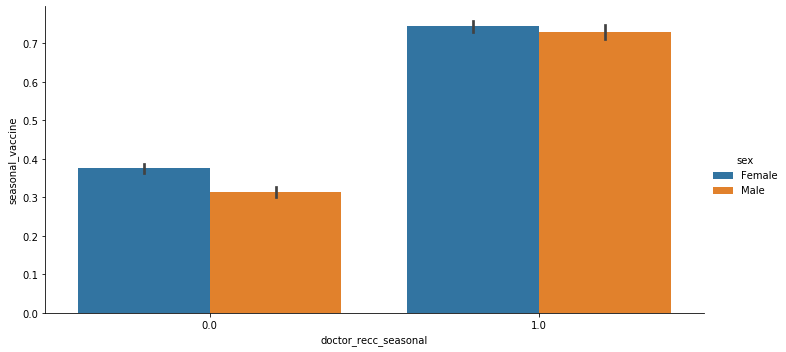

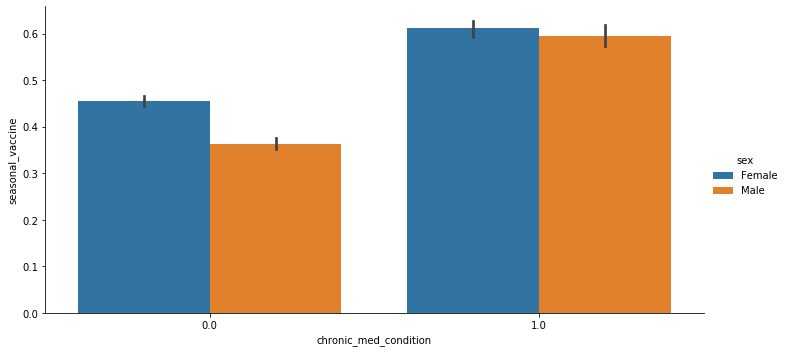

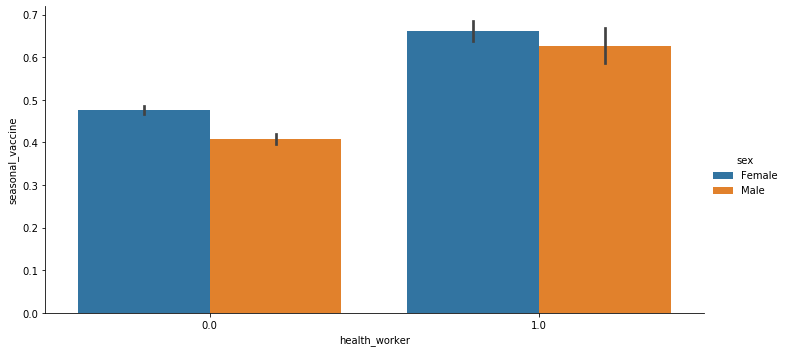

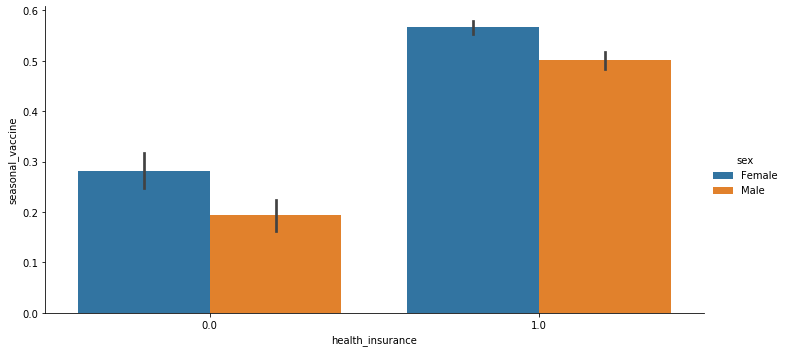

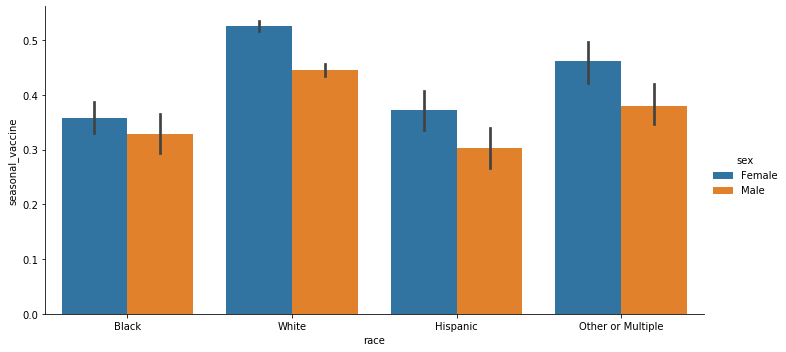

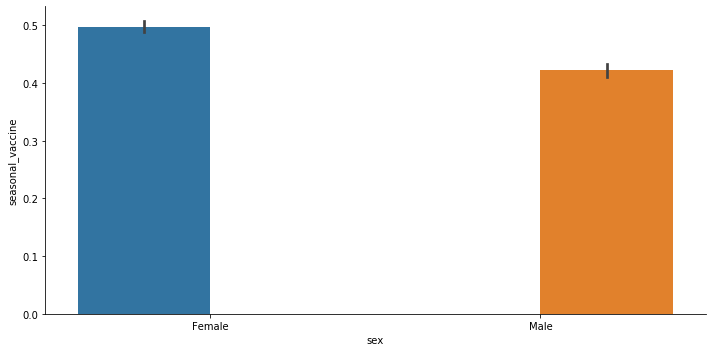

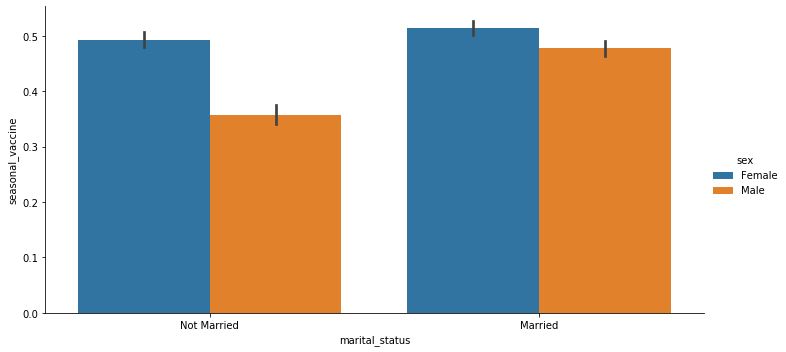

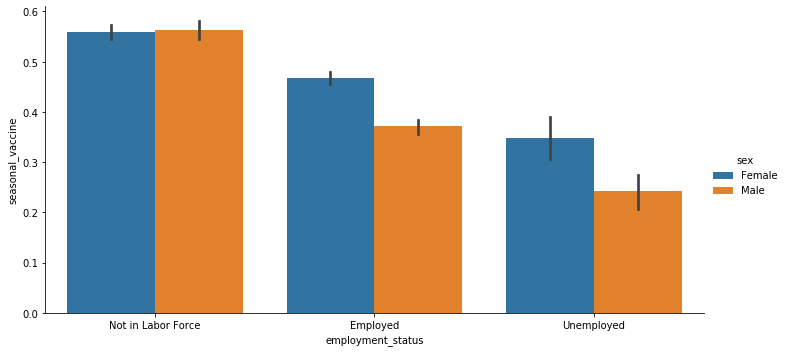

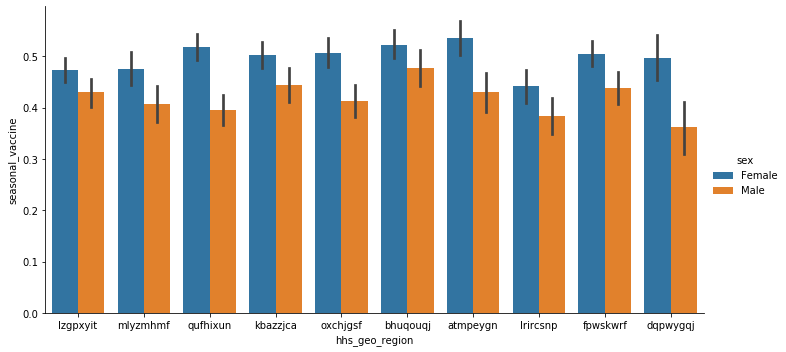

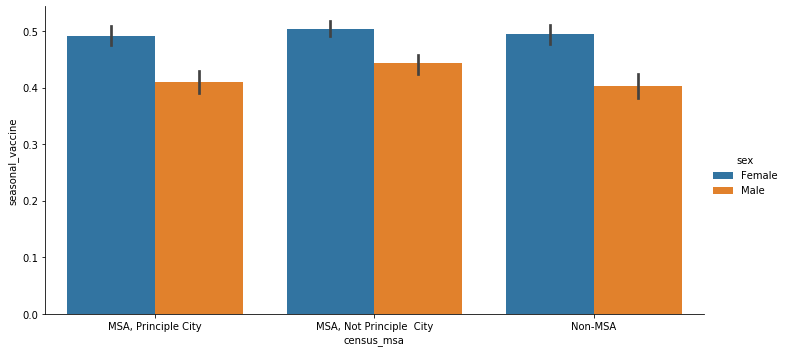

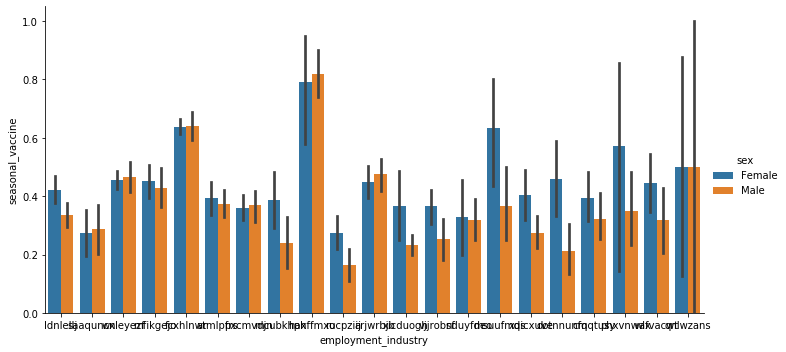

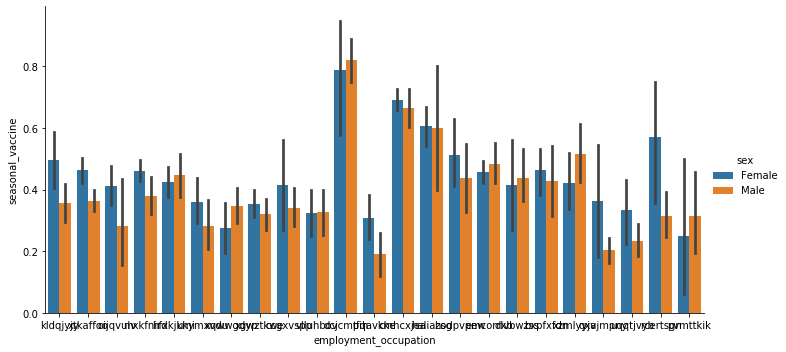

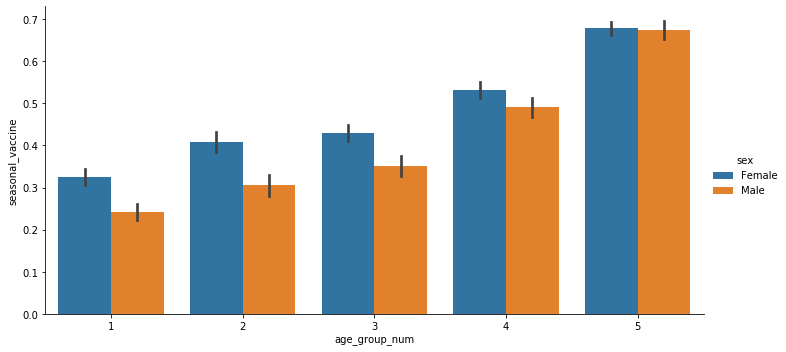

In [19]:
# plot bar graphs for each variable vs target
# test different hues to get sense of variable interactions
# one interaction is between 'sex' and 'marital_status' - married men get more vaccines than unmarried men
# also 'sex' and 'employment status' --> probably due to age

for c in train_to_plot.drop(columns=['seasonal_vaccine']).columns:
    sns.catplot(x=c, y="seasonal_vaccine", kind="bar", hue='sex', data=train_to_plot, height=5, aspect=2)

In [20]:
# investigate how many rows have nulls
# cannot delete rows with missing health_insurance, since about 50%
# check for overlaps in nulls in other 3 rows, may be possible to delete these rows

X_train_delete_nulls = X_train.loc[(X_train['doctor_recc_seasonal'].notnull()
                                      & X_train['chronic_med_condition'].notnull()
                                      & X_train['health_worker'].notnull())]
X_train_delete_nulls

# if we delete all nulls in all 3 columns, we lose 2295 rows, 11% of data

print('If I deleted rows with nulls in doctor_recc_seasonal, chronic_med_condition, health_worker:')
print('Number of rows deleted:', len(X_train) - len(X_train_delete_nulls))
print('Per cent of rows deleted:', round(((len(X_train) - len(X_train_delete_nulls))/len(X_train)*100),2), '%')

# my instinct is to impute a dummy value, but could also test a model with these rows deleted

If I deleted rows with nulls in doctor_recc_seasonal, chronic_med_condition, health_worker:
Number of rows deleted: 2252
Per cent of rows deleted: 11.24 %


In [21]:
# encode categorical columns in X_train
X_train_enc = pd.get_dummies(X_train, drop_first=False).drop(columns=['sex_Female','race_Other or Multiple'])


In [22]:
# 4 columns still have nulls
X_train_enc.isna().sum()[:4]

doctor_recc_seasonal     1624
chronic_med_condition     731
health_worker             610
health_insurance         9174
dtype: int64

In [23]:
# create new columns to capture missing info prior to filling nans with 0

X_train_nans=X_train_enc.copy()
X_train_nans['null_doctor_recc'] = X_train_nans['doctor_recc_seasonal'].apply(lambda x:1 if pd.isnull(x) else 0)
X_train_nans['null_chronic'] = X_train_nans['doctor_recc_seasonal'].apply(lambda x:1 if pd.isnull(x) else 0)
X_train_nans['null_health_worker'] = X_train_nans['health_worker'].apply(lambda x:1 if pd.isnull(x) else 0)
X_train_nans['null_health_ins'] = X_train_nans['health_insurance'].apply(lambda x:1 if pd.isnull(x) else 0)
X_train_nans.head(100)


,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,null_doctor_recc,null_chronic,null_health_worker,null_health_ins
1917,0.00000,0.00000,0.00000,1.00000,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12198,0.00000,0.00000,0.00000,1.00000,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12877,1.00000,nan,nan,nan,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2034,0.00000,0.00000,0.00000,nan,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4072,0.00000,0.00000,0.00000,nan,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15775,1.00000,1.00000,0.00000,nan,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2285,1.00000,0.00000,0.00000,0.00000,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6591,0.00000,0.00000,0.00000,nan,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1148,0.00000,0.00000,0.00000,nan,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
22489,0.00000,0.00000,0.00000,0.00000,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# fill nans with 0

X_train_nans.fillna(value=0, inplace=True)
X_train_nans.isna().sum().sum() #0
X_train_nans.shape #(20030, 81)
X_train_nans

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,null_doctor_recc,null_chronic,null_health_worker,null_health_ins
1917,0.00000,0.00000,0.00000,1.00000,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12198,0.00000,0.00000,0.00000,1.00000,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12877,1.00000,0.00000,0.00000,0.00000,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2034,0.00000,0.00000,0.00000,0.00000,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4072,0.00000,0.00000,0.00000,0.00000,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16048,0.00000,0.00000,0.00000,0.00000,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
22788,1.00000,0.00000,0.00000,0.00000,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19944,1.00000,0.00000,0.00000,0.00000,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
19718,0.00000,0.00000,0.00000,1.00000,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,

In [25]:
# run X_test thru same steps

# encode categorical columns
X_test_enc = pd.get_dummies(X_test, drop_first=False).drop(columns=['sex_Female','race_Other or Multiple'])

# create columns to track null values
X_test_nans=X_test_enc.copy()
X_test_nans['null_doctor_recc'] = X_test_nans['doctor_recc_seasonal'].apply(lambda x:1 if pd.isnull(x) else 0)
X_test_nans['null_chronic'] = X_test_nans['doctor_recc_seasonal'].apply(lambda x:1 if pd.isnull(x) else 0)
X_test_nans['null_health_worker'] = X_test_nans['health_worker'].apply(lambda x:1 if pd.isnull(x) else 0)
X_test_nans['null_health_ins'] = X_test_nans['health_insurance'].apply(lambda x:1 if pd.isnull(x) else 0)

# fill remaining nulls with dummy value 0.5
X_test_nans.fillna(value=0, inplace=True)

X_test_nans

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,null_doctor_recc,null_chronic,null_health_worker,null_health_ins
8632,0.00000,1.00000,0.00000,0.00000,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
23753,1.00000,1.00000,0.00000,0.00000,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12173,0.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3623,0.00000,1.00000,0.00000,0.00000,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25066,1.00000,0.00000,0.00000,1.00000,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15784,0.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14296,0.00000,1.00000,1.00000,0.00000,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18394,0.00000,0.00000,0.00000,0.00000,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25938,1.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0

ROC Scores
Train: 0.7810430287058738
Test: 0.7768067297590606


Accuracy Scores
Train: 0.7132800798801797
Test: 0.7076531376366632


F1 Scores
Train: 0.6832846192025589
Test: 0.6740146960587843


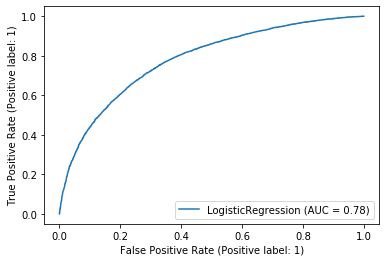

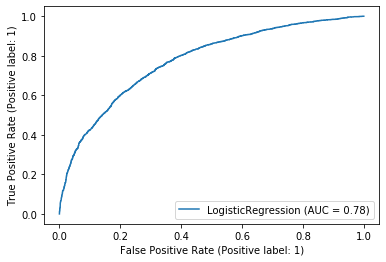

In [26]:
# plot ROC curves
logreg = ut.logreg_predict_score(X_train_nans, X_test_nans, y_train, y_test)
plot_roc_curve(logreg, X_train_nans, y_train)
plot_roc_curve(logreg, X_test_nans, y_test)

In [27]:
# scores when dropped 1 columns - female
# ROC Scores
# Train: 0.7817244813917411
# Test: 0.7748843069535213

# scores when dropped 2 columns - female and other race
# ROC Scores
# Train: 0.7803958619891809
# Test: 0.7782699504901386

# scores when 5 columns dropped
# ROC Scores
# Train: 0.780485435457886
# Test: 0.772152694994743
# worse!!!

In [28]:
# Let's scale it!  # test Standard Scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nans)
X_test_scaled = scaler.transform(X_test_nans)

In [29]:
ut.logreg_predict_score(X_train_scaled, X_test_scaled, y_train, y_test)

# no change - makes sense since everything is already on a 0-1 scale

ROC Scores
Train: 0.7810891098735552
Test: 0.7768629687583782


Accuracy Scores
Train: 0.7126310534198702
Test: 0.7073536019170286


F1 Scores
Train: 0.6946419098143236
Test: 0.6868589743589744


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [30]:
# Let's scale it!  # test MixMax Scaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_nans)
X_test_scaled = scaler.transform(X_test_nans)

ut.logreg_predict_score(X_train_scaled, X_test_scaled, y_train, y_test)

# no change - makes sense since everything is already on a 0-1 scale

ROC Scores
Train: 0.7810430287058738
Test: 0.7768067297590606


Accuracy Scores
Train: 0.7132800798801797
Test: 0.7076531376366632


F1 Scores
Train: 0.6832846192025589
Test: 0.6740146960587843


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [31]:
# add interaction term for man & married

X_train_inter = X_train_nans.copy()
X_train_inter['man_Married'] = X_train_inter['sex_Male'] * X_train_inter['marital_status_Married']
X_train_inter

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,null_doctor_recc,null_chronic,null_health_worker,null_health_ins,man_Married
1917,0.00000,0.00000,0.00000,1.00000,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12198,0.00000,0.00000,0.00000,1.00000,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12877,1.00000,0.00000,0.00000,0.00000,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2034,0.00000,0.00000,0.00000,0.00000,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4072,0.00000,0.00000,0.00000,0.00000,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16048,0.00000,0.00000,0.00000,0.00000,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
22788,1.00000,0.00000,0.00000,0.00000,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19944,1.00000,0.00000,0.00000,0.00000,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
19718,0.00000,0.00000,0.00000,1.00000,0,1,0,0,0,0,0,

In [32]:
# do same steps on X_test
X_test_inter = X_test_nans.copy()
X_test_inter['man_Married'] = X_test_inter['sex_Male'] * X_test_inter['marital_status_Married']
X_test_inter

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,null_doctor_recc,null_chronic,null_health_worker,null_health_ins,man_Married
8632,0.00000,1.00000,0.00000,0.00000,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
23753,1.00000,1.00000,0.00000,0.00000,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12173,0.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3623,0.00000,1.00000,0.00000,0.00000,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25066,1.00000,0.00000,0.00000,1.00000,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15784,0.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14296,0.00000,1.00000,1.00000,0.00000,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18394,0.00000,0.00000,0.00000,0.00000,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
25938,1.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0

In [33]:
# test version with interaction term

ut.logreg_predict_score(X_train_inter, X_test_inter, y_train, y_test)

# no change

ROC Scores
Train: 0.7810348178068086
Test: 0.7768172012260282


Accuracy Scores
Train: 0.7126809785322017
Test: 0.7075033697768459


F1 Scores
Train: 0.6828676916294706
Test: 0.6736842105263158


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [34]:
# test fit_intercept=True

# make logistic regression
logreg = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear')
logreg.fit(X_train_nans, y_train)

# print ROC scores
ut.score(X_train_nans, X_test_nans, y_train, y_test, logreg)

# no change

ROC Scores
Train: 0.7810426882539615
Test: 0.7768077227429973


Accuracy Scores
Train: 0.7132800798801797
Test: 0.7076531376366632


F1 Scores
Train: 0.6832846192025589
Test: 0.6740146960587843


In [35]:
# test C

c_list = [10,100,1000]

# make logreg and score
for c in c_list:
    # make logistic regression
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    logreg.fit(X_train_nans, y_train)
    print(logreg)
    ut.score(X_train_nans, X_test_nans, y_train, y_test, logreg)
    print('\n')
    
# no change

LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7810399746519532
Test: 0.7768166595984264


Accuracy Scores
Train: 0.7133300049925112
Test: 0.7075033697768459


F1 Scores
Train: 0.6833223031105229
Test: 0.6739021539489064


LogisticRegression(C=100, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7810428684932093
Test: 0.7768088962694677


Accuracy Scores
Train: 0.7132800798801797
Test: 0.7076531376366632


F1 Scores
Train: 0.6832846192025589
Test: 0.6740146960587843


LogisticRegression(C=1000, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7810430186925824
Test: 0.7768069103015945


Accuracy Scores
Train: 0.7132800798801797
Test: 0.7076531376366632


F1 Scores
Train: 0.6832846192025589
Test: 0.6740146960587843




In [36]:
# test solvers

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for s in solvers:
    # make logistic regression
    logreg = LogisticRegression(fit_intercept=False, C=1e12, solver=s)
    logreg.fit(X_train_nans, y_train)
    # score
    print(logreg)
    ut.score(X_train_nans, X_test_nans, y_train, y_test, logreg)
    print('\n')
    
    # no change

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='newton-cg')
ROC Scores
Train: 0.781043879835655
Test: 0.7768065492165267


Accuracy Scores
Train: 0.7132800798801797
Test: 0.7076531376366632


F1 Scores
Train: 0.6832846192025589
Test: 0.6740146960587843




/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1000000000000.0, fit_intercept=False)
ROC Scores
Train: 0.7810412563532707
Test: 0.776817923396164


Accuracy Scores
Train: 0.7131303045431853
Test: 0.7078029054964805


F1 Scores
Train: 0.6831715924128804
Test: 0.6743448506092471


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7810430287058738
Test: 0.7768067297590606


Accuracy Scores
Train: 0.7132800798801797
Test: 0.7076531376366632


F1 Scores
Train: 0.6832846192025589
Test: 0.6740146960587843


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='sag')
ROC Scores
Train: 0.7810441001280689
Test: 0.776805646503857


Accuracy Scores
Train: 0.7132800798801797
Test: 0.7076531376366632


F1 Scores
Train: 0.6832846192025589
Test: 0.6740146960587843


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='saga')
ROC Scores
Train: 0.7810437897160312
Test: 0.7768070005728615


Accuracy Scores
Train: 0.7132800798801797
Test: 0.707653137636663

In [37]:
# no change when using different scalers, adding interaction terms, or changing logreg parameters
# stick with inital df (X_train_nans)
# stick with initial values for logreg
best_logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
best_logreg.fit(X_train_nans, y_train)

# check out coefficients
len(best_logreg.coef_[0])
len(X_train_nans.columns)

coef_dict={}

for n, c in enumerate(X_train_nans.columns):
    coef_dict[c]=round(best_logreg.coef_[0][n],2)

sorted_coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1], reverse=True)}

df = pd.DataFrame.from_dict(sorted_coef_dict, orient='index', columns=['weight'])
df['abs_weight']=np.abs(df['weight'])
df.sort_values(by = 'abs_weight', ascending=False)

,weight,abs_weight
doctor_recc_seasonal,1.49000,1.49000
employment_industry_haxffmxo,1.42000,1.42000
employment_occupation_dcjcmpih,1.42000,1.42000
age_group_18 - 34 Years,-0.95000,0.95000
employment_industry_msuufmds,0.88000,0.88000
employment_industry_fcxhlnwr,0.81000,0.81000
employment_industry_phxvnwax,0.76000,0.76000
employment_industry_arjwrbjb,0.72000,0.72000
census_msa_Non-MSA,-0.72000,0.72000
health_worker,0.70000,0.70000


In [38]:
# some coefficients are surprising, for example why is non-MSA service area such a big influence?
# in the bar plots, the proportions of vaccine vs no vaccine looked similar to other groups
# so I ran the lists below to be sure my coefficients were linking up to the right column labels
# they are

tuple_list = []

for n in range(79):
    tuple = (n, best_logreg.coef_[0][n])
    tuple_list.append(tuple)
    
tuple_list

[(0, 1.4927448292712784),
 (1, 0.36687953921515),
 (2, 0.6981728702574829),
 (3, 0.6038744165738955),
 (4, -0.9482266920586935),
 (5, -0.7000616942347868),
 (6, -0.5438826388977153),
 (7, -0.16504985639821898),
 (8, 0.5338283466533462),
 (9, -0.6182670647464266),
 (10, -0.1260672091018074),
 (11, 0.03450516569306603),
 (12, -0.06413017972228323),
 (13, 0.12495790542296406),
 (14, -0.08490528363256943),
 (15, -0.5330234272542888),
 (16, -0.09225033769109273),
 (17, -0.44096276076013663),
 (18, -0.0742692557993143),
 (19, -0.1160344413647495),
 (20, -0.3563662663662864),
 (21, -0.10157005442553868),
 (22, -0.08954098746061896),
 (23, -0.3024863707556943),
 (24, -0.19918078543985138),
 (25, -0.26852554796505607),
 (26, -0.09301510640352251),
 (27, -0.2224037189539646),
 (28, -0.5701078220050445),
 (29, -0.5328553452912379),
 (30, -0.7204293676403217),
 (31, 0.7228098879413594),
 (32, 0.6012707068223322),
 (33, 0.395660232827413),
 (34, 0.25802794624219466),
 (35, 0.8105349403553033),
 (36

In [39]:
col_list = []

for n in range(79):
    tuple = (n, X_train_nans.columns[n])
    col_list.append(tuple)
    
col_list

[(0, 'doctor_recc_seasonal'),
 (1, 'chronic_med_condition'),
 (2, 'health_worker'),
 (3, 'health_insurance'),
 (4, 'age_group_18 - 34 Years'),
 (5, 'age_group_35 - 44 Years'),
 (6, 'age_group_45 - 54 Years'),
 (7, 'age_group_55 - 64 Years'),
 (8, 'age_group_65+ Years'),
 (9, 'race_Black'),
 (10, 'race_Hispanic'),
 (11, 'race_White'),
 (12, 'sex_Male'),
 (13, 'marital_status_Married'),
 (14, 'marital_status_Not Married'),
 (15, 'employment_status_Employed'),
 (16, 'employment_status_Not in Labor Force'),
 (17, 'employment_status_Unemployed'),
 (18, 'hhs_geo_region_atmpeygn'),
 (19, 'hhs_geo_region_bhuqouqj'),
 (20, 'hhs_geo_region_dqpwygqj'),
 (21, 'hhs_geo_region_fpwskwrf'),
 (22, 'hhs_geo_region_kbazzjca'),
 (23, 'hhs_geo_region_lrircsnp'),
 (24, 'hhs_geo_region_lzgpxyit'),
 (25, 'hhs_geo_region_mlyzmhmf'),
 (26, 'hhs_geo_region_oxchjgsf'),
 (27, 'hhs_geo_region_qufhixun'),
 (28, 'census_msa_MSA, Not Principle  City'),
 (29, 'census_msa_MSA, Principle City'),
 (30, 'census_msa_Non-MSA

ROC Scores
Train: 0.9899556872797384
Test: 0.6262213476741879


Accuracy Scores
Train: 0.9336495257114329
Test: 0.6215366182417253


F1 Scores
Train: 0.9274286026320101
Test: 0.5885035010584596


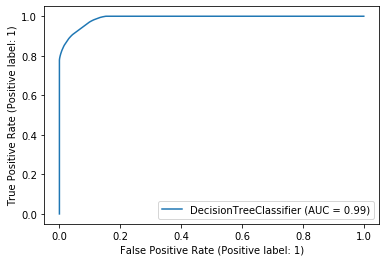

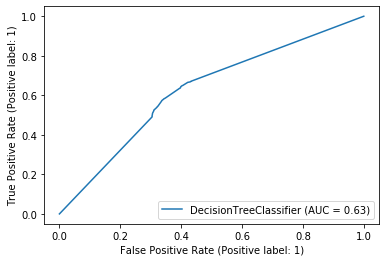

In [44]:
# let's do another model!

tree = DecisionTreeClassifier()

ut.eval_tree(X_train_nans, X_test_nans, y_train, y_test, tree)

# yikes, that's really overfit!  let's prune the tree

ROC Scores
Train: 0.7705687502533987
Test: 0.7602428549840843


Accuracy Scores
Train: 0.7139291063404892
Test: 0.6982177624681744


F1 Scores
Train: 0.6909718476971202
Test: 0.6718775443738805


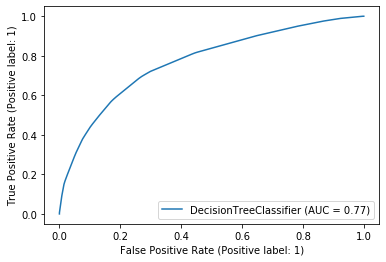

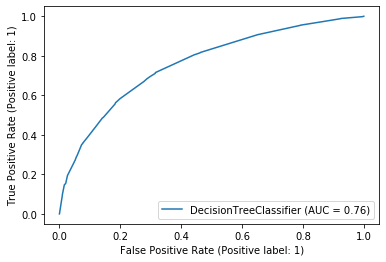

In [74]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=5, max_features=55, criterion='gini')

ut.eval_tree(X_train_nans, X_test_nans, y_train, y_test, tree)

# better, but not better than logreg

In [108]:
def order_features(weights, X_train):
    
    coef_dict = {}

    for n, c in enumerate(X_train.columns):
        coef_dict[c]=round(weights[n],4)

    sorted_coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1], reverse=True)}
    df = pd.DataFrame.from_dict(sorted_coef_dict, orient='index', columns=['weight'])
    df['abs_weight']=np.abs(df['weight'])
    weights_df = df.sort_values(by = 'abs_weight', ascending=False)
    
    return weights_df

In [109]:
tree.feature_importances_

array([5.23590667e-01, 1.13240975e-02, 7.85837937e-02, 1.52550772e-02,
       1.42117571e-01, 6.14061542e-03, 0.00000000e+00, 8.82320941e-03,
       1.21831445e-01, 1.89087044e-03, 0.00000000e+00, 2.40679152e-02,
       3.21472659e-03, 3.54924198e-03, 2.73959086e-03, 0.00000000e+00,
       2.84154499e-03, 2.21718315e-03, 5.55328811e-04, 0.00000000e+00,
       1.04255146e-03, 4.98966474e-04, 0.00000000e+00, 9.26926199e-04,
       2.26307747e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.72941795e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.61736205e-03,
       2.15566713e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.60288657e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.64008567e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.12244385e-03,
       0.00000000e+00, 0.00000000e+00, 1.23661714e-03, 4.01413816e-03,
      

In [110]:
order_features(tree.feature_importances_, X_train_nans)

,weight,abs_weight
doctor_recc_seasonal,0.52360,0.52360
age_group_18 - 34 Years,0.14210,0.14210
age_group_65+ Years,0.12180,0.12180
health_worker,0.07860,0.07860
race_White,0.02410,0.02410
employment_industry_haxffmxo,0.02160,0.02160
health_insurance,0.01530,0.01530
chronic_med_condition,0.01130,0.01130
age_group_55 - 64 Years,0.00880,0.00880
employment_industry_fcxhlnwr,0.00760,0.00760


In [98]:
tree_param_grid = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 5, 6, 7],
                 'min_samples_leaf': [7, 8, 9],
                 'min_samples_split': [9, 10, 11]}
                 
tree_grid_search = GridSearchCV(tree, rf_param_grid, cv=3)
tree_grid_search.fit(X_train_nans, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 70.69%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 10}


ROC Scores
Train: 0.7699350891379709
Test: 0.7616086592532292


Accuracy Scores
Train: 0.7136794807788317
Test: 0.7016624232439719


F1 Scores
Train: 0.6950603498697293
Test: 0.6795366795366795


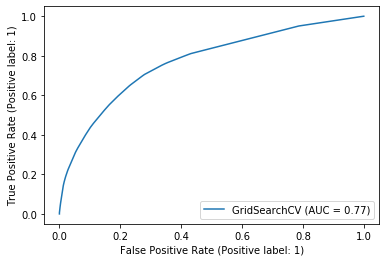

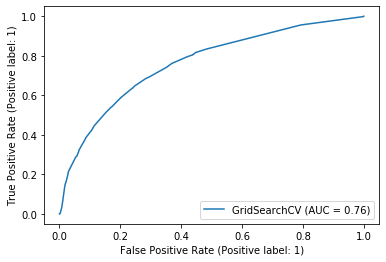

In [99]:
ut.eval_tree(X_train_nans, X_test_nans, y_train, y_test, tree_grid_search)

In [118]:
tree_grid_search.best_estimator_.feature_importances_

array([4.80458261e-01, 1.09031170e-02, 8.43093662e-02, 1.32569166e-02,
       2.12363610e-02, 0.00000000e+00, 0.00000000e+00, 4.42656313e-02,
       2.52108205e-01, 1.66275764e-03, 0.00000000e+00, 2.12855638e-02,
       0.00000000e+00, 6.21338516e-03, 3.00925992e-03, 3.04416656e-03,
       4.44015524e-04, 3.92709361e-03, 2.54788671e-03, 1.90332001e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.26335478e-03,
       0.00000000e+00, 0.00000000e+00, 1.71295528e-03, 5.23451801e-04,
       0.00000000e+00, 0.00000000e+00, 4.58180060e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.34914508e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.99623698e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.36949345e-03,
       0.00000000e+00, 4.45073302e-04, 0.00000000e+00, 2.31885485e-03,
       4.40150243e-04, 0.00000000e+00, 0.00000000e+00, 2.02522298e-02,
      

In [79]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train_nans, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

ROC Scores
Train: 0.7737727682348273
Test: 0.7687437904652239


Accuracy Scores
Train: 0.7132800798801797
Test: 0.7042084768608656


F1 Scores
Train: 0.6958640046602765
Test: 0.6835443037974683


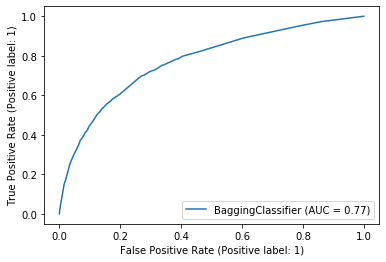

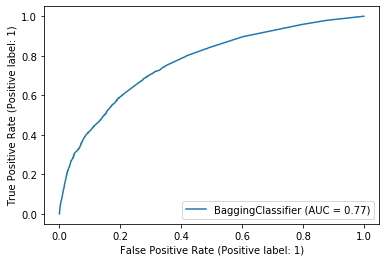

In [80]:
ut.eval_tree(X_train_nans, X_test_nans, y_train, y_test, bagged_tree)

In [85]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train_nans, y_train)

RandomForestClassifier(max_depth=5)

ROC Scores
Train: 0.7759256809896888
Test: 0.7718162633075646


Accuracy Scores
Train: 0.7113829256115827
Test: 0.7076531376366632


F1 Scores
Train: 0.6656255422522991
Test: 0.658621895767751


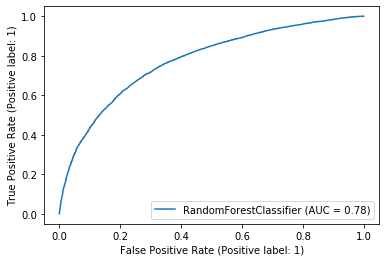

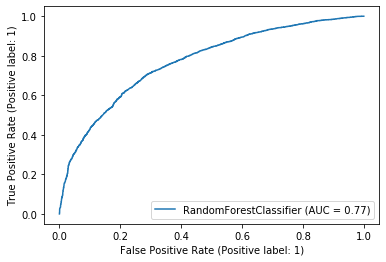

In [86]:
ut.eval_tree(X_train_nans, X_test_nans, y_train, y_test, forest)

In [92]:
rf_param_grid = {'n_estimators': [10,30,100],
                 'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 2, 6, 10],
                 'min_samples_split': [5, 10],
                 'min_samples_leaf': [3, 6]}
                 
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_nans, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")



KeyboardInterrupt: 

ROC Scores
Train: 0.8317807774862275
Test: 0.7708429585071732


Accuracy Scores
Train: 0.7465801298052921
Test: 0.7075033697768459


F1 Scores
Train: 0.72238022314592
Test: 0.677882236516576


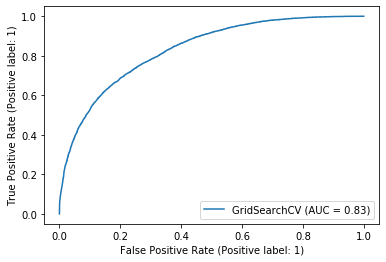

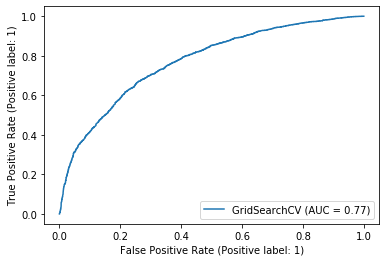

In [93]:
ut.eval_tree(X_train_nans, X_test_nans, y_train, y_test, rf_grid_search)

In [42]:
# make a model-less baseline?

y_pred_mean = np.full_like(y_train, fill_value=y_train.mean(), dtype=np.double)
y_pred_mode = np.full_like(y_train, fill_value=y_train.mode(), dtype=np.double)

In [43]:
roc_auc_score(y_train, y_pred_mean) 
roc_auc_score(y_train, y_pred_mode)

# how do you get a y-score or decision function for this?

0.5